In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [24]:
path = Path('gdrive/MyDrive/training/ml/Sample_Data')
os.chdir(path)

In [27]:
fns = get_image_files('Car_Models')
fns

(#397) [Path('Car_Models/rx8/c439f3c1-63a8-4dcf-b3c4-8839a16f2e66.jpg'),Path('Car_Models/rx8/6de60e6e-17ad-4757-bbbb-11aa0b38225a.jpg'),Path('Car_Models/rx8/7b058456-84d4-4962-8b97-b11ef34610c5.jpg'),Path('Car_Models/rx8/bb936be0-bd18-45f6-aa24-0c3ed2c895b9.jpg'),Path('Car_Models/rx8/08a90e76-ecbe-4d4a-a8fe-c2837c847b36.jpg'),Path('Car_Models/rx8/c1e66d36-fb1d-4e09-8a83-6cd5240ebc62.jpg'),Path('Car_Models/rx8/613da418-a526-4a6c-94a8-40cccf77afae.jpg'),Path('Car_Models/rx8/c5242e45-43bb-4eba-b842-a746aea0cb60.jpg'),Path('Car_Models/rx8/50e865f5-57aa-458d-adc6-81f28c729357.jpg'),Path('Car_Models/rx8/765f6971-098b-4e69-bfd7-a0672f384ac6.jpg')...]

In [38]:
dataPath = Path('Car_Models')

cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [39]:
dls = cars.dataloaders(dataPath)

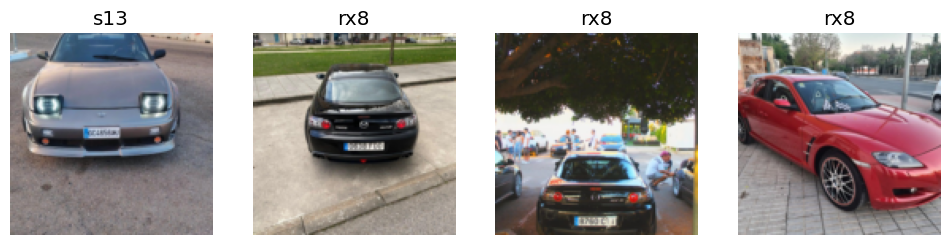

In [31]:
dls.valid.show_batch(max_n=4, nrows=1)

In [46]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(dataPath)

In [47]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.846420,1.022156,0.481013,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.383263,0.851013,0.392405,00:09
1,1.118609,0.728799,0.354430,00:07
2,0.970503,0.645904,0.227848,00:10
3,0.855767,0.579885,0.164557,00:08
4,0.742566,0.524743,0.151899,00:10
5,0.660263,0.508491,0.151899,00:09
6,0.607982,0.493743,0.139240,00:07


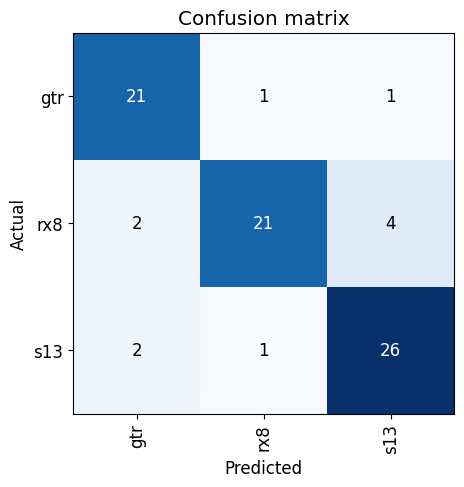

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

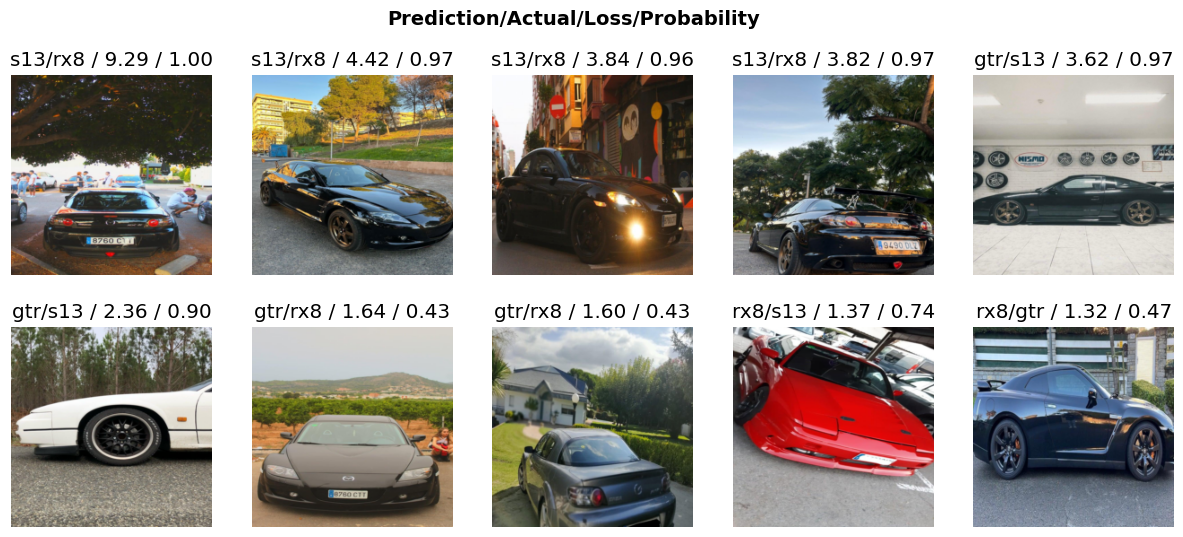

In [50]:
interp.plot_top_losses(10, nrows=2)

In [51]:
learn.export()